In [1]:
import numpy
import pandas as pd
from sklearn.manifold import SpectralEmbedding
from sklearn.datasets import make_swiss_roll, make_s_curve
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Spectral_Embedding.spectral_embedding import *

# Swiss Roll

Measuring the time for getting Spectral embedding vetors of sklearn rbf, sklearn nearest neighbour and self implemented

In [3]:
N_swiss = 5000
X_es_swiss, t_swiss = make_swiss_roll(N_swiss, random_state = 1337)

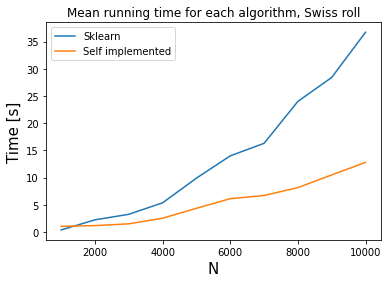

In [4]:
data = pd.read_csv('time_swiss_old.txt', index_col='N')
data.head()
data.plot(y = [0, 2], label=['Sklearn', 'Self implemented'])
plt.title('Mean running time for each algorithm, Swiss roll')
plt.xlabel('N', fontsize = 15)
plt.ylabel('Time [s]', fontsize = 15)
plt.show()

In [5]:
embedding_swiss_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf', eigen_solver = "arpack")
#%timeit embedding_swiss.fit_transform(X_es_swiss)

In [6]:
embedding_swiss_n = SpectralEmbedding(n_components=2, n_neighbors=10)
#%timeit embedding_swiss_n.fit_transform(X_es_swiss)

In [7]:
#%timeit spec_emd(X_es_swiss, 2)

In [8]:
spectral_swiss_sk_rbf = embedding_swiss_rbf.fit_transform(X_es_swiss)
spectral_swiss_sk_n = embedding_swiss_n.fit_transform(X_es_swiss)
spectral_swiss_own = spec_emd(X_es_swiss, 2)

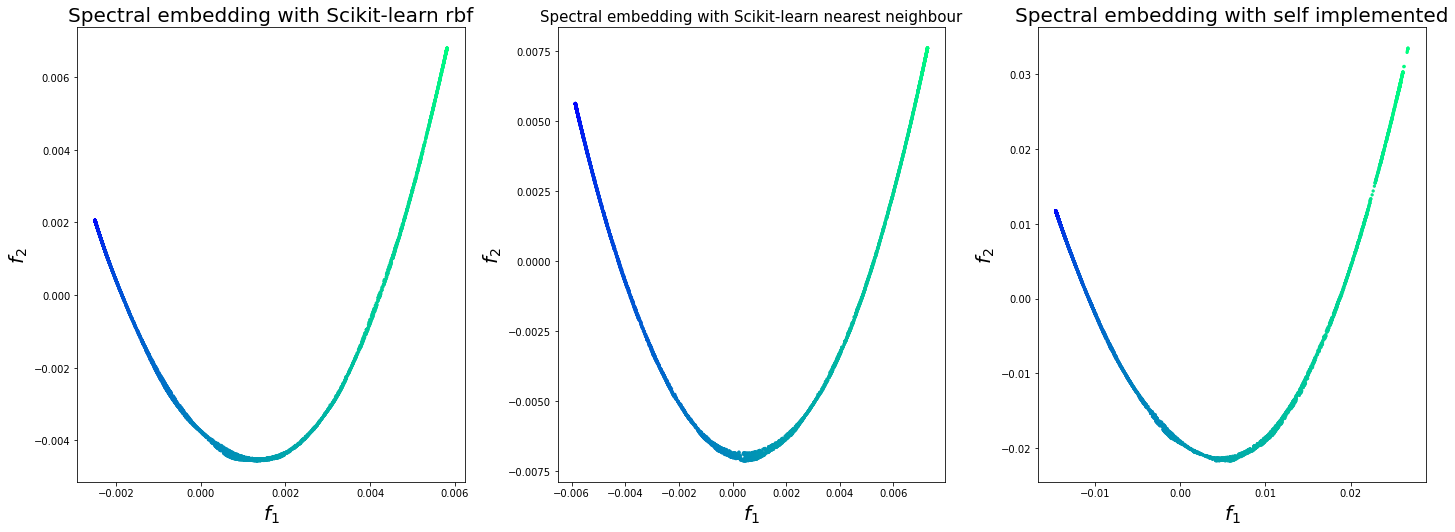

In [9]:
height = 3
fig = plt.figure(figsize=(20, 7.5))
ax = fig.subplots(1, height)

ax[0].scatter(spectral_swiss_sk_rbf[:,0], spectral_swiss_sk_rbf[:,1], s=5, c=t_swiss, cmap='winter')
ax[0].set_xlabel(r'$f_1$', fontsize = 20)
ax[0].set_ylabel(r'$f_2$', fontsize = 20)
ax[0].set_title('Spectral embedding with Scikit-learn rbf', fontsize = 20)
ax[0].tick_params(axis='both', labelsize = 10)
#ax[0].set_ylim(-0.01, 0.01)
ax[0].locator_params(axis='y', nbins=7)

ax[1].scatter(spectral_swiss_sk_n[:,0], spectral_swiss_sk_n[:,1], s=5, c=t_swiss, cmap='winter')
ax[1].set_xlabel(r'$f_1$', fontsize = 20)
ax[1].set_ylabel(r'$f_2$', fontsize = 20)
ax[1].set_title('Spectral embedding with Scikit-learn nearest neighbour', fontsize = 15)
ax[1].tick_params(axis='both', labelsize = 10)
#ax[1].set_ylim(-0.01, 0.01)
ax[1].locator_params(axis='y', nbins=7)

ax[2].scatter(-spectral_swiss_own[:,0], -spectral_swiss_own[:,1], s=5, c=t_swiss, cmap='winter')
ax[2].set_xlabel(r'$f_1$', fontsize = 20)
ax[2].set_ylabel(r'$f_2$', fontsize = 20)
ax[2].set_title('Spectral embedding with self implemented', fontsize = 20)
ax[2].tick_params(axis='both', labelsize = 10)
#ax[2].set_ylim(-0.01, 0.01)
ax[2].locator_params(axis='y', nbins=7)


fig.tight_layout()

# S-curve Roll

Measuring the time for getting spectral embedding of sklearn rbf, sklearn nearest neighbour and self implemented

In [10]:
N_scurve = 5000
X_es_scurve, t_scurve = make_s_curve(N_scurve, random_state = 1337)

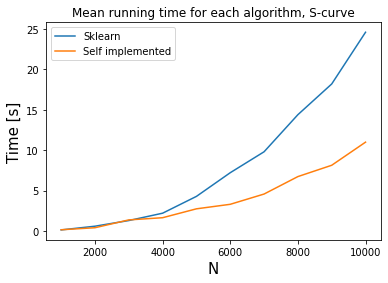

In [11]:
data = pd.read_csv('time_scurve_old.txt', index_col='N')
data.head()
data.plot(y = [0, 2], label=['Sklearn', 'Self implemented'])
plt.title('Mean running time for each algorithm, S-curve')
plt.xlabel('N', fontsize = 15)
plt.ylabel('Time [s]', fontsize = 15)
plt.show()

In [12]:
embedding_scurve_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf', eigen_solver = "arpack")
#%timeit embedding_scurve_rbf.fit_transform(X_es_scurve)

In [13]:
embedding_scurve_n = SpectralEmbedding(n_components=2, n_neighbors=10)
#%timeit embedding_scurve_n.fit_transform(X_es_scurve)

In [14]:
#%timeit spec_emd(X_es_scurve, 2)

In [15]:
spectral_scurve_sk_rbf = embedding_scurve_rbf.fit_transform(X_es_scurve)
spectral_scurve_sk_n = embedding_swiss_n.fit_transform(X_es_scurve)
spectral_scurve_own = spec_emd(X_es_scurve, 2)

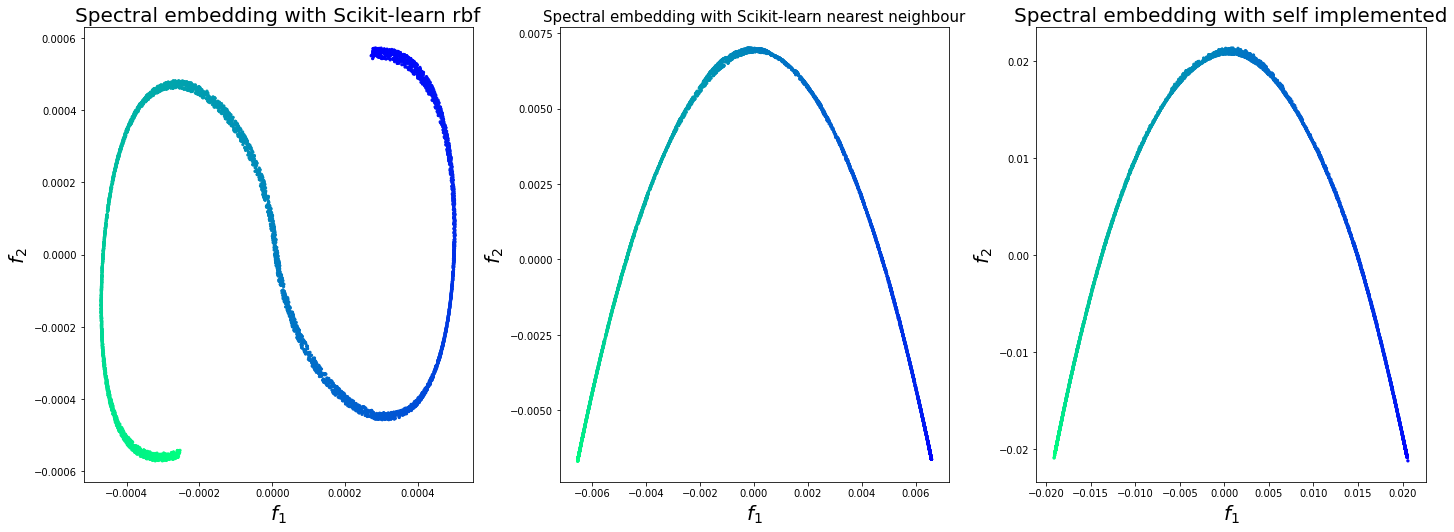

In [18]:
height = 3
fig = plt.figure(figsize=(20, 7.5))
ax = fig.subplots(1, height)

ax[0].scatter(spectral_scurve_sk_rbf[:,0], spectral_scurve_sk_rbf[:,1], s=5, c=t_scurve, cmap='winter')
ax[0].set_xlabel(r'$f_1$', fontsize = 20)
ax[0].set_ylabel(r'$f_2$', fontsize = 20)
ax[0].set_title('Spectral embedding with Scikit-learn rbf', fontsize = 20)
ax[0].tick_params(axis='both', labelsize = 10)
#ax[0].set_ylim(-0.01, 0.01)
ax[0].locator_params(axis='y', nbins=7)

ax[1].scatter(spectral_scurve_sk_n[:,0], spectral_scurve_sk_n[:,1], s=5, c=t_scurve, cmap='winter')
ax[1].set_xlabel(r'$f_1$', fontsize = 20)
ax[1].set_ylabel(r'$f_2$', fontsize = 20)
ax[1].set_title('Spectral embedding with Scikit-learn nearest neighbour', fontsize = 15)
ax[1].tick_params(axis='both', labelsize = 10)
#ax[1].set_ylim(-0.01, 0.01)
ax[1].locator_params(axis='y', nbins=7)

ax[2].scatter(spectral_scurve_own[:,0], spectral_scurve_own[:,1], s=5, c=t_scurve, cmap='winter')
ax[2].set_xlabel(r'$f_1$', fontsize = 20)
ax[2].set_ylabel(r'$f_2$', fontsize = 20)
ax[2].set_title('Spectral embedding with self implemented', fontsize = 20)
ax[2].tick_params(axis='both', labelsize = 10)
#ax[2].set_ylim(-0.01, 0.01)
ax[2].locator_params(axis='y', nbins=7)

fig.tight_layout()